## James Griffin
### Midterm 


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import optimize
import sympy as sy
from sympy import symbols
from math import cos, sqrt, sin 

(1) Numerically find the minimum (HINT: there are 2) of the following function using at least
2 different methods (for example BFGS vs. Adam).

You may restrict your domain to x1 ∈ [−3, 3] and x2 ∈ [−2, 2]. Include evidence of the
convergence of your numerical method, and comparisons between the two methods that
you chose. Discuss why you think one of them works better than the other (or can you
tell?).

In [2]:
## building fucntions 
x1,x2 = sy.symbols('x1, x2', real=True)
f_1 = (4 - 2.1*x1**2 + (1/3)*x1**4)*x1**2 + (x1*x2) + (x2**2)*(4*x2**2 -4)

f1p = sy.lambdify((x1,x2), f_1)
f1 = lambda x: f1p(x[0], x[1])

In [3]:
#getting derivative   

Df1 = f_1.diff(x1)
Df2 = f_1.diff(x2)

Df1_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df1, Df2]))
df1 = lambda x: Df1_lambdified(x[0],x[1])[:,0]

Ok now that we have the function, we want to look at the different partial derivatives  and the hessian  

In [4]:
Df1_x1 = f_1.diff(x1).expand()
Df1_x1x2 = Df1_x1.diff(x2).expand()
Df1_x2 = f_1.diff(x2).expand()
Df1_x2x1 = Df1_x2.diff(x1).expand()

In [5]:
hessian_f1 = sy.hessian(f_1, (x1, x2)).expand()
print("This is the Hesssian for Q1 just to  see ")
hessian_f1

This is the Hesssian for Q1 just to  see 


Matrix([
[10.0*x1**4 - 25.2*x1**2 + 8,            1],
[                          1, 48*x2**2 - 8]])

Turning these into lambified fucntions and into an array 

In [6]:
def get_lambda_func(func):
    func_p = sy.lambdify((x1,x2), func)
    func_l = lambda x: func_p(x[0], x[1])
    return func_l

df1_x1_l = get_lambda_func(Df1_x1)
df1_x1x2_l = get_lambda_func(Df1_x1x2)
df1_x2_l= get_lambda_func(Df1_x2)
df1_x2x1_l = get_lambda_func(Df1_x2x1)


hessian_1 = np.array([df1_x1_l, df1_x1x2_l, df1_x2_l, df1_x2x1_l])

ok going to code up bfgs

In [74]:
def bfgs(df, x0, maxiter = 1000, d = 2, alpha = .01, eps =1e-10):
    '''
    takes  in a derivative, a sttarting guess,  
    and then all other parameters are  default from  
    standard literature  pracice 
    '''
    r = x0
    min_vals = []
    #counter starts  at 0 
    iters = 0
    #set x old to initial guess 
    x_old = x0
    #
    s_old = np.ones(len(x0))
    u_old = np.ones(len(df(x0)))
    
    #evaluate  derivative at initialg uesss 
    g_old = df(x0)
    
    #calculate old hessia  
    H_old = (s_old.T@u_old / np.linalg.norm(u_old)) * np.eye(df(x0).shape[0])
    
    conv = []
    #we  want  to find two minimizing values 
    
    #because we want to look for two minimizers 
    #until we have two  
    while len(min_vals)<2:
        print(min_vals)
        
        #iterate 
        for i in range(maxiter):
            
            #if we have  found a min 
            if len(min_vals)==1:
                print("here")
                conv = []
                print(min_vals)
                print(conv)
                #reset everything 
                x_old = np.random.choice(np.linspace(-d,d), 2)
                
        
                s_old = np.ones(len(x0))
                u_old = np.ones(len(df(x0)))

                #evaluate  derivative at initialg uesss 
                g_old = df(x0)

                #calculate old hessia  
                H_old = (s_old.T@u_old / np.linalg.norm(u_old)) * np.eye(df(x0).shape[0])
                H_new = (np.eye(len(x_old)) - (np.outer(s_old,u_old) / np.inner(s_old,u_old))) @ H_old @ (np.eye(len(x_old)) - (np.outer(u_old,s_old)/np.inner(u_old,s_old))) + np.outer(s_old,s_old) / (u_old@s_old)

                x_new = x_old - alpha*g_old@H_new
                
                #to go again 
                break
            
        
            #new hessian 
            
            H_new = (np.eye(len(x_old)) - (np.outer(s_old,u_old) / np.inner(s_old,u_old))) @ H_old @ (np.eye(len(x_old)) - (np.outer(u_old,s_old)/np.inner(u_old,s_old))) + np.outer(s_old,s_old) / (u_old@s_old)
            
            #
            x_new = x_old - alpha*g_old@H_new
            g_new = df(x_new)

            #using the norm  difference of the two to be our  convergence condition 
            #print("here"+str(iters))
            conv.append(np.linalg.norm(x_new - x_old))
            
            #increment 
            iters += 1
            
            #check stopping condition 
            if np.linalg.norm(H_new-H_old)<eps:
                break
            if g_new.all() == 0:
                break

            #update values 
            s_old = (x_new - x_old)
            u_old = (g_new - g_old)
            g_old = g_new
            x_old = x_new
            H_old = H_new
            
        plt.title("convergence for point " + str(len(min_vals)))
        plt.plot(conv)
        plt.show()
        print(len(conv))
        min_vals.append(x_new)
        
    print(" ")

    return min_vals, conv

In [28]:
bfgs_points, bfgs_f1_conv1 = bfgs(df1, np.random.choice(np.linspace(-2,2), 2), 
                                 alpha = .01)

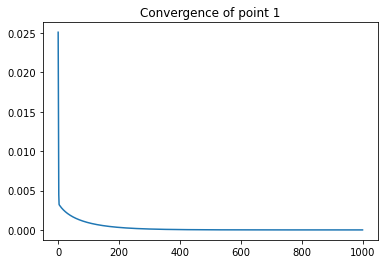

In [67]:
plt.plot(bfgs_f1_conv1[0])
plt.title("Convergence of point 1")
plt.show()

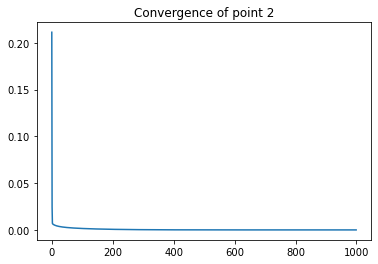

In [68]:
plt.plot(bfgs_f1_conv1[1])
plt.title("Convergence of point 2")
plt.show()

In [31]:
bfgs_points

[array([-0.0898514 ,  0.71265311]), array([-0.08985504,  0.71267541])]

now building / using atom  


In [53]:
def adam(f,df,x0, b1=.9, b2=.999, e=.01, m=.9, eta=.01,  N=1000, eps = 1e-12):
    '''
    takes in funcion,  
    derivative, 
    inittial guess 
    
    all other inputs are set to default by industry andl iterature defaults
    '''
    
    mins = []
    
    iteration = 0
    fs = []
    xold = x0
    g = df(xold)
    m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
    v = np.sqrt((1-b2)*df(xold)**2)
    xnew = xold  - eta*(sqrt(1-b2))/(1-b1)*m/(v+e)
    
    while(len(mins) <2):
        #iterate 
        for i in range(N):
            
            if len(mins)==1:
                fs = []
                xold = np.random.choice(np.linspace(-2,2), 2)
                g = df(xold)
                m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
                v = np.sqrt((1-b2)*df(xold)**2)
                xnew = xold  - eta*(sqrt(1-b2))/(1-b1)*m/(v+e)
                
                break
            #print(type(xold))
            m = b1*m + (1-b1)*df(xold)
            v = np.sqrt((b2*v)+(1-b2)*df(xold)**2)
            #print(type(v))
            xnew =  xold - eta*((sqrt(1-b2))/(1-b1))*m/(v+e)
            iteration += 1 
            fs.append(np.linalg.norm(xnew-xold))
        
    return mins,fs


In [61]:
adam_f1_point_1, adam_f1_conv_1 = adam(f1, df1, np.random.choice(np.linspace(-2,2), 2), e=1e-8, eta=.1, N=1000, eps = 1e-12)

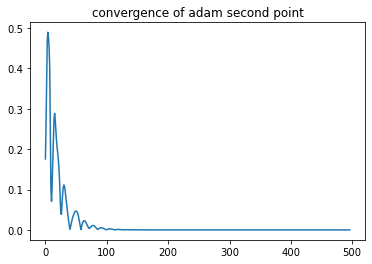

In [63]:
plt.plot(adam_f1_conv_2[1])
plt.title("convergence of adam second point")
plt.show()

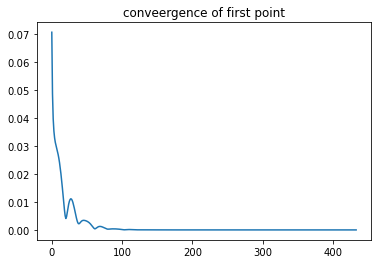

In [60]:
plt.plot(adam_f1_conv_1[0])
plt.title("conveergence of first point")
plt.show()

In [57]:
print("ADAM approximation of min values ")
adam_f1_points = [adam_f1_point_1,  adam_f1_point_2]
adam_f1_points

ADAM approximation of min values 


[array([ 0.08984201, -0.7126564 ]), array([ 0.08984201, -0.7126564 ])]

In [59]:
bfgs_points

[array([-0.0898514 ,  0.71265311]), array([-0.08985504,  0.71267541])]

#### findings 
We  found the  exact same points, just inverted, and we can see that both approaches converge, bfgs does so faster  


# Question 2 

2) This is the same as the previous problem, but now for the function

In this case you may restrict the domain to xi ∈[−5.12, 5.12]. Note that this function will
likely be much more difficult to minimize. Why is that the case? Do either of the methods
you chose actually reach a global minimizer? If so, what is it? (For this problem you may
not find the global minimizer numerically but you will very likely be able to figure out
what the minimum is).

In [69]:
from sympy import cos, sqrt
f_2 = (1+cos(12*(sqrt(x1**2 + x2**2))))/(2+.5*(x1**2 + x2**2))

f2p = sy.lambdify((x1,x2), f_1)
f2 = lambda x: f2p(x[0], x[1])

In [70]:
#getting derivative   

Df_21 = f_2.diff(x1)
Df_22 = f_2.diff(x2)

Df2_lambdified = sy.lambdify((x1,x2),sy.Matrix([Df_21, Df_22]))
df2 = lambda x: Df2_lambdified(x[0],x[1])[:,0]

In [71]:
hessian_f2 = sy.hessian(f_2, (x1, x2)).expand()
print("This is the Hesssian for Q2 just to  see ")
hessian_f2

This is the Hesssian for Q1 just to  see 


Matrix([
[0.25*x1**2*cos(12*sqrt(x1**2 + x2**2))/(0.015625*x1**6 + 0.046875*x1**4*x2**2 + 0.1875*x1**4 + 0.046875*x1**2*x2**4 + 0.375*x1**2*x2**2 + 0.75*x1**2 + 0.015625*x2**6 + 0.1875*x2**4 + 0.75*x2**2 + 1) + 0.25*x1**2/(0.015625*x1**6 + 0.046875*x1**4*x2**2 + 0.1875*x1**4 + 0.046875*x1**2*x2**4 + 0.375*x1**2*x2**2 + 0.75*x1**2 + 0.015625*x2**6 + 0.1875*x2**4 + 0.75*x2**2 + 1) + 6.0*x1**2*sin(12*sqrt(x1**2 + x2**2))/(0.0625*x1**4*sqrt(x1**2 + x2**2) + 0.125*x1**2*x2**2*sqrt(x1**2 + x2**2) + 0.5*x1**2*sqrt(x1**2 + x2**2) + 0.0625*x2**4*sqrt(x1**2 + x2**2) + 0.5*x2**2*sqrt(x1**2 + x2**2) + sqrt(x1**2 + x2**2)) + 12*x1**2*sin(12*sqrt(x1**2 + x2**2))/(0.5*x1**4*sqrt(x1**2 + x2**2) + 1.0*x1**2*x2**2*sqrt(x1**2 + x2**2) + 2*x1**2*sqrt(x1**2 + x2**2) + 0.5*x2**4*sqrt(x1**2 + x2**2) + 2*x2**2*sqrt(x1**2 + x2**2)) - 144*x1**2*cos(12*sqrt(x1**2 + x2**2))/(0.5*x1**4 + 1.0*x1**2*x2**2 + 2*x1**2 + 0.5*x2**4 + 2*x2**2) - 0.25*cos(12*sqrt(x1**2 + x2**2))/(0.0625*x1**4 + 0.125*x1**2*x2**2 + 0.5*x1**

In [72]:
print("wow this is literally disgusting ")

wow this is literally disgusting 


In [79]:

def bfgs(df, x0, maxiter = 1000, alpha = .001, eps =1e-10):
    iters = 0
    x_old = x0
    s_old = np.ones(len(x0))
    u_old = np.ones(len(df(x0)))
    g_old = df(x0)
    H_old = (s_old.T@u_old / np.linalg.norm(u_old)) * np.eye(df(x0).shape[0])
    conv = []
    for i in range(maxiter):
        
        H_new = (np.eye(len(x_old)) - (np.outer(s_old,u_old) / np.inner(s_old,u_old))) @ H_old @ (np.eye(len(x_old)) - (np.outer(u_old,s_old)/np.inner(u_old,s_old))) + np.outer(s_old,s_old) / (u_old@s_old)
        
        x_new = x_old - alpha*g_old@H_new
        g_new = df(x_new)
        conv.append(np.linalg.norm(x_new - x_old))
        iters += 1
        if np.linalg.norm(H_new-H_old)<eps:
            break
        if g_new.all() == 0:
            break
        s_old = (x_new - x_old)
        u_old = (g_new - g_old)
        g_old = g_new
        x_old = x_new
        H_old = H_new
        
    return x_new, conv
bfgs_f2_pt1, bfgs_f2_conv1 = bfgs(df2, np.random.choice(np.linspace(-5,5), 2),  alpha = .01)      
bfgs_f2_pt2, bfgs_f2_conv2 = bfgs(df2, np.random.choice(np.linspace(-5,5), 2),  alpha = .01)  

In [82]:
bfgs_points = [bfgs_f2_pt1, bfgs_f2_pt2]
q2_conv = [bfgs_f2_conv1, bfgs_f2_conv2]


In [115]:
from math import sqrt
def adam(f,df,x0, b1=.9, b2=.999, e=.01, m=.9, eta=1e-3,  N=1000, eps = 1e-12):
    iteration = 0
    fs = []
    xold = x0
    g = df(xold)
    m = b1*np.zeros(len(x0))+(1-b1)*df(xold)
    v = np.sqrt((1-b2)*df(xold)**2)
    xnew = xold  - eta*(np.sqrt(1-b2))/(1-b1)*m/(v+e)
    
    for i in range(N):
        
        xold = xnew
        
        right = df(xold)
        m = b1*m + (1-b1)*df(xold)
        v = np.sqrt((b2*v)+(1-b2)*df(xold)**2)
        #print(type(v))
        xnew =  xold - eta*((sqrt(1-b2))/(1-b1))*m/(v+e)
        iteration += 1 
        fs.append(np.linalg.norm(xnew-xold))
    return xnew, fs

In [123]:
adam_f2_point1, adam_f2_conv1 = adam(f2, df2, np.random.choice(np.linspace(-5,5), 2), e=1e-8, eta=.01, N=1000, eps = 1e-12)


In [124]:
adam_f2_point1

array([-1.6167283 , -2.38314893])

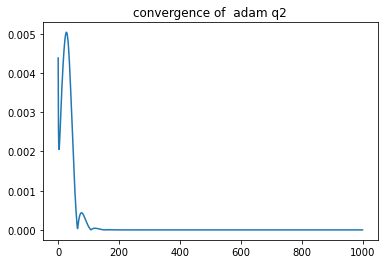

In [126]:
plt.plot(adam_f2_conv1)
plt.title("convergence of  adam q2")
plt.show()

 ####  Note that this function will likely be much more difficult to minimize. Why is that the case? Do either of the methods you chose actually reach a global minimizer? 
 
 If we look at the hessian matrix, we can see that it is literally disgusting, so there are many local minima, so because we start each attempt to find the global minuma by selecting a random point from within the domain. Because the hessian is so complex, the derivative changes only slightly, so in attempting to trying go through the gradient descent, we get stuck easily when our learning rate is small, but when it is  big, we  diverge easily, so  balancing  those two hyper  parameters is  really hard 

#### Do either of the methods you chose actually reach a global minimizer? 

I do not  believe I found the global from either approach 

# Question 3 

Develop a neural network that classifies all 10 digits of MNIST. Report on the accuracy/loss
of the training when you are done. You should be able to achieve at least 95% accuracy
relatively easily. Feel free to use either linear or convolutional layers with pooling.

In [127]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn

In [128]:
mnist_train = datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST("./data", train=False, download=True, transform=transforms.ToTensor())

In [129]:
#going to shuffle the data just in case there are any sequential dependencies  
train_loader = DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 100, shuffle=False)

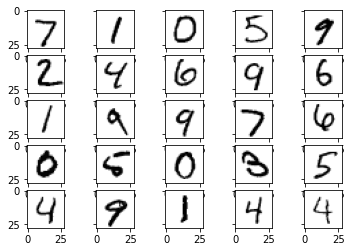

In [130]:
#looking at a sample of our data 
imgs = (test_loader.dataset.data.float()/225).view(len(test_loader.dataset), -1)
f,ax = plt.subplots(5,5, sharey=True)
for i in range(25):
    ax[i%5][i//5].imshow(1-imgs[i].view(28,28).numpy(), cmap="gray")
    ax

In [131]:
def accuracy(outs, targs):
    _, preds = torch.max(outs, dim = 1)
    return(torch.tensor(torch.sum(preds == targs).item()/ len(preds)))

In [132]:
class q3_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,24,5)
        self.conv2 = nn.Conv2d(24,8,3)
        self.conv3 = nn.Conv2d(8,1,3)
        self.linear1 = nn.Linear(3872,10)

    def forward (self,inp):
        intermed1 = self.conv1(inp)
        intermed1 = F.relu(intermed1)
        intermed2 = self.conv2(intermed1)
        intermed2 = F.relu(intermed2)
        #reshape 
        intermed2 = intermed2.view(intermed2.size(0), -1) 
        out = self.linear1(intermed2)
        return(out)

    def train(self, batch):
        imgs, targs = batch
        out = self(imgs)
        loss = F.cross_entropy(out,targs)
        return(loss)

    def validate(self, batch):
        imgs, targs = batch
        out = self(imgs)
        loss = F.cross_entropy(out,targs)
        acc = accuracy(out,targs)
        return({'validate_loss':loss, 'validate_accuracy': acc})

    def validate_epoch_end(self, outs):
        batch_loss = [x['validate_loss'] for x in outs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_accs = [x['validate_accuracy'] for x in outs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'validate_loss': epoch_loss.item(), 'validate_accuracy' : epoch_acc.item()})
    
    def epoch_end(self, epoch,result):
        print("Epoch [{}], validate_loss: {:.4f}, validate_accuracy: {:.4f}".format(epoch, result['validate_loss'], result['validate_accuracy']))





In [133]:
def evaluate(model, test_loader):
    outputs = [model.validate(batch) for batch in test_loader]
    return(model.validate_epoch_end(outputs))
    
    
def fit(epochs, lr, model, train_loader, test_loader, opt_func = torch.optim.SGD):
    history = []
    opt = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        ## Training Phase
        for batch in train_loader:
            loss = model.train(batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
        
        ## Validation phase
        result = evaluate(model, test_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [134]:
model3 = q3_model()
history3 = fit(10, 0.01, model3, train_loader, test_loader)

Epoch [0], validate_loss: 0.3570, validate_accuracy: 0.8926
Epoch [1], validate_loss: 0.3056, validate_accuracy: 0.9129
Epoch [2], validate_loss: 0.2755, validate_accuracy: 0.9222
Epoch [3], validate_loss: 0.2410, validate_accuracy: 0.9279
Epoch [4], validate_loss: 0.1924, validate_accuracy: 0.9438
Epoch [5], validate_loss: 0.1458, validate_accuracy: 0.9579
Epoch [6], validate_loss: 0.1185, validate_accuracy: 0.9672
Epoch [7], validate_loss: 0.1026, validate_accuracy: 0.9709
Epoch [8], validate_loss: 0.0892, validate_accuracy: 0.9738
Epoch [9], validate_loss: 0.0829, validate_accuracy: 0.9754


we got to a greater than 95% accuracy, we used a convolution, with a size of 5 at first, and then a size of 3, and hade each layer have a decreasing number of nodes as we got deeper.  It was only 4 layers, 3 convolutions and one linear layer for our output. 

In [145]:
3872/()

12.1

In [141]:
484/

60.5